In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label = 'Train_loss')
  plt.plot(history.history['val_loss'], label='Validation loss')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


In [ ]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label = 'Trian_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
  plt.title('accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

# 1. 데이터 전처리

In [ ]:
import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [ ]:
# 필요 라이브러리

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

import numpy as np
np.random.seed(0)  # 랜덤 시드
tf.random.set_seed(1)
import matplotlib.pyplot as plt

In [ ]:
#데이터 로드
# MNIST 데이터
#mnist = tf.keras.datasets.mnist

# MNIST 데이터 나누기(Train / Test)
#(train_images, train_label), (test_images, test_label) = datasets.mnist.load_data()
#train_images.shape, test_images.shape

#num_classes = 10  # 0 ~ 9 

In [ ]:
# 데이터 로드
(train_images, train_label), (test_images, test_label) = datasets.mnist.load_data()

train_images.shape, test_images.shape

# 하이퍼파라미터 변수 설정

LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]

In [ ]:
# 이미지 데이터 0 ~ 1 Scaling

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

#train_images.shape, test_images.shape

In [ ]:
# 라벨 데이터 One-hot Encoding

train_label = np_utils.to_categorical(train_label)
test_label = np_utils.to_categorical(test_label)

In [ ]:
# 데이터셋 생성

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_label)).shuffle(N_TRAIN).batch(N_BATCHS,drop_remainder=True).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_label)).batch(N_BATCHS)

# 2. 모델구현

In [ ]:
def create_mnist_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=32, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=64, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=128, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(10, activation='softmax'),
])
  
  return model

In [ ]:
# 옵티마이저와 손실함수를 설정, acc 나오도록 컴파일

model = create_mnist_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 출력

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 19, 19, 128)     

In [ ]:
# 학습 전 모델 평가

model.evaluate(test_dataset)

steps_per_epoch = N_TRAIN/N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))

history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch,
                    validation_data=test_dataset,validation_steps=validation_steps)

100/100 [==============================] - 1s 7ms/step - loss: 2.3002 - accuracy: 0.0853
Epoch 1/20
600/600 [==============================] - 11s 17ms/step - loss: 0.1316 - accuracy: 0.9591 - val_loss: 0.0421 - val_accuracy: 0.9860
Epoch 2/20
600/600 [==============================] - 10s 16ms/step - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.0280 - val_accuracy: 0.9914
Epoch 3/20
600/600 [==============================] - 10s 17ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0229 - val_accuracy: 0.9927
Epoch 4/20
600/600 [==============================] - 10s 16ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0292 - val_accuracy: 0.9907
Epoch 5/20
600/600 [==============================] - 10s 16ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0247 - val_accuracy: 0.9926
Epoch 6/20
600/600 [==============================] - 10s 16ms/step - loss: 0.0189 - accuracy: 0.9936 - val_loss: 0.0269 - val_accuracy: 0.9928
Epoch 7/20
600/600 [===========================

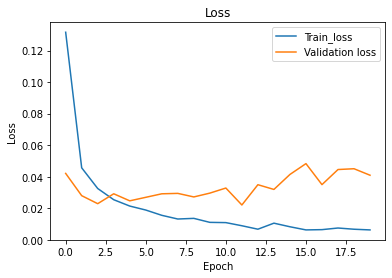

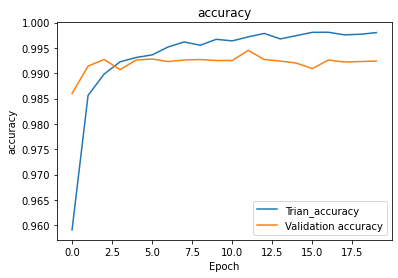

In [ ]:
plot_loss(history)
plot_accuracy(history)

# 예측 에러

In [ ]:
# 예측 에러가 발생한 샘플 확인
# Test dataset 예측

pred = model.predict(test_images)
pred_label = np.argmax(pred, axis = 1)

pred.shape, pred_label.shape

313/313 [==============================] - 1s 2ms/step


((10000, 10), (10000,))

In [ ]:
# 예측 에러가 발생한 데이터들 -> index 저장

index = np.where(test_dataset != pred_label)[0]
print(index.shape)
index[:10]

(10000,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
print(pred_label)

[7 2 1 ... 4 5 6]


In [ ]:
# 모델 저장
# 가중치 저장 및 불러오기

import os
current_dir = os.getcwd() # 현재 작업 dir
checkpoint_dir = 'checkpoints' # 가중치 저장할 dir
file_name = 'cnn_model_mnist.checkpoint'

dir = os.path.join(current_dir, checkpoint_dir)
os.makedirs(dir, exist_ok=True)

file_path = os.path.join(dir, file_name)
print(file_path)

# 모델의 가중치 저장

model.save_weights(file_path)

/content/checkpoints/cnn_model_mnist.checkpoint


In [ ]:
# 가중치 불러오기
# 모델 생성

new_model = create_mnist_model()
new_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
new_model.evaluate(test_dataset) # loss : 2.3018 / acc : 0.0761

# new model에 저장된 가중치 설정

new_model.load_weights(file_path)
new_model.evaluate(test_dataset) # loss : 0.0409 / acc : 0.9924

100/100 [==============================] - 1s 7ms/step - loss: 0.0409 - accuracy: 0.9924


[0.040938057005405426, 0.9923999905586243]

In [ ]:
# Callback을 사용한 모델 저장 및 Early Stopping

new_model = create_mnist_model()
new_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_path = os.path.join(current_dir, 'callback_checkpoint')
os.makedirs(checkpoint_path, exist_ok=True)

checkpoint_filepath = os.path.join(checkpoint_path, 'cnn_mnist_{epoch}.checkpoint')
print(checkpoint_filepath)

/content/callback_checkpoint/cnn_mnist_{epoch}.checkpoint


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# callback 생성
# epoch마다 학습한 가중치들을 저장하는 callback

checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, 
                                                      save_best_only=True)

# early stopping callback

earlystopping_callback=keras.callbacks.EarlyStopping(monitor='val loss', patience=10)

In [ ]:
# callback을 이용한 모델 학습

history = new_model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch,
                    validation_data=test_dataset,validation_steps=validation_steps,
                    callbacks=[checkpoint_callback, earlystopping_callback])

Epoch 1/20
599/600 [============================>.] - ETA: 0s - loss: 0.1494 - accuracy: 0.9548WARNING: AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7f2031f7c8b0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7f2031f7c8b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
600/600 [==============================] - 12s 19ms/step - loss: 0.1492 - accuracy: 0.9549 - val_loss: 0.0371 - val_accuracy: 0.9865
Epoch 2/20
600/600 [==============================] - ETA: 0s - loss: 0

In [ ]:
# 함수형 API를 사용하여 모델 구성

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

def create_mnist_model_fn():
    
    #input 레이어

    input = layers.Input(shape=(28,28,1))
    conv1 = layers.Conv2D(filters = 32, kernel_size=3,activation='relu')(input)
    pool1 = layers.MaxPool2D()(conv1)

    conv2 = layers.Conv2D(filters = 64, kernel_size=3,activation='relu')(input)
    pool2 = layers.MaxPool2D()(conv2)

    flatten = layers.Flatten()(pool2)
    dense1 = layers.Dense(256, activation='relu')(flatten)
    dropout1 = layers.Dropout(0.5)(dense1)
    output = layers.Dense(10, activation='softmax')(dropout1)

    #모델 생성

    new_model2 = keras.Model(inputs=input, outputs=output)

    return new_model2


new_model2 = create_mnist_model_fn()
new_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

new_model2.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_63 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 10816)             0         
                                                                 
 dense_46 (Dense)            (None, 256)               2769152   
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                           